In [95]:
# Import the Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [96]:
# Read the File
url = "https://raw.githubusercontent.com/she-code-africa/SCAMP-Cohort6-Technical-Assessment/master/intermediate/fake_job_postings.csv"
df = pd.read_csv(url)

In [97]:
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [98]:
df.shape

(17880, 18)

In [99]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [101]:
df["industry"] = df["industry"].fillna(method = 'ffill')
print(df["industry"])

0                              NaN
1        Marketing and Advertising
2        Marketing and Advertising
3                Computer Software
4           Hospital & Health Care
                   ...            
17875            Computer Software
17876                     Internet
17877                     Internet
17878               Graphic Design
17879            Computer Software
Name: industry, Length: 17880, dtype: object


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             17879 non-null  object
 16  func

In [102]:
df.shape

(17880, 18)

In [103]:
len(df[df.fraudulent == 0]), len(df[df.fraudulent == 1])

(17014, 866)

In [104]:
df1=df.drop_duplicates()

In [105]:
df1.shape

(17880, 18)

In [106]:
num_of_industry = len(df['industry'].unique())
num_of_industry

132

In [107]:
plt.figure(figsize=(10,6))
df1 = df.groupby('industry').fraudulent.count().sort_values(ascending=False)
df1

industry
Information Technology and Services    2390
Computer Software                      1869
Internet                               1501
Marketing and Advertising              1136
Financial Services                     1125
                                       ... 
Nanotechnology                            2
Museums and Institutions                  2
Shipbuilding                              1
Alternative Dispute Resolution            1
Wine and Spirits                          1
Name: fraudulent, Length: 131, dtype: int64

<Figure size 720x432 with 0 Axes>

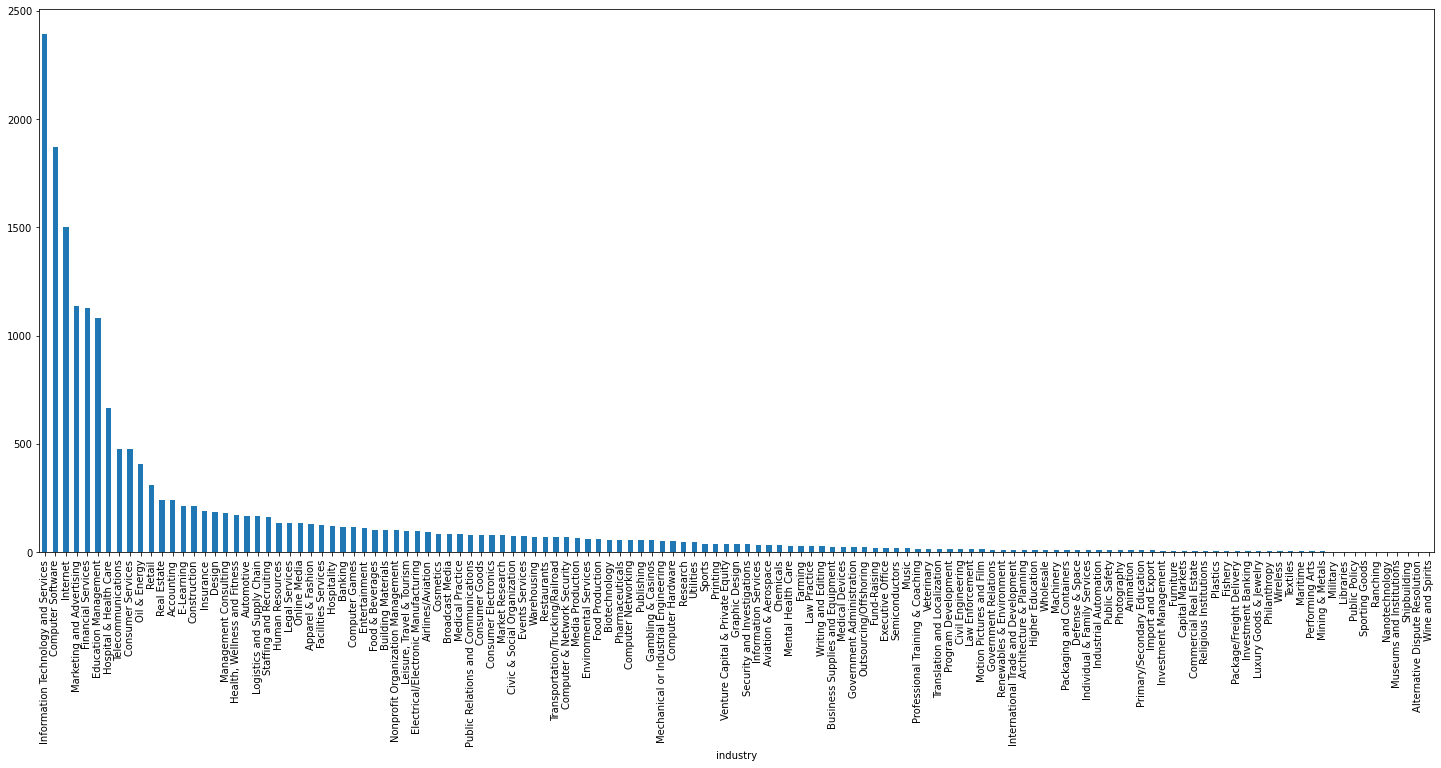

In [109]:
plt.figure(figsize=(25,10))
df1.plot(x = " Number of Fradulent Industries", y = "Industry", kind='bar')
plt.xticks(rotation=90)
plt.show()

**The Most Fraudulent industry is the Information and Technology Services Industry**